<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text analysis

This notebook considers the analysis of text in R. 

For more information on all the techniques and packages available in this area, please refer to:

Text Analysis in R by Kasper Welbers, Wouter Van Atteveldt, and Kenneth Benoit (Institute for Media Studies, University of Leuven, Leuven, Belgium; bDepartment of Communcation Science, VU University Amsterdam, Amsterdam, The Netherlands; cDepartment of Methodology, London School of Economics and Political Science, London, UK)

In this notebook we make use of Dutch 'troonredes' (yearly speech by the King or Queen) as our toy dataset for exploring the different options available when working with text in R.


In [22]:
install.packages('quanteda')
install.packages('tokenizers')
install.packages('tm')
install.packages('ggplot2')
install.packages('corrplot')

library(quanteda)
library(tokenizers)
library(tm)
library(ggplot2)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Loading the data

The data can be directly downloaded from github and contains 36 speeches.

In [23]:
troonredes <- read.csv("https://raw.githubusercontent.com/Jlokkerbol/masterclass/main/troonredes.csv")
head(troonredes,1)

Tekst                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

## Preparing the data

We first change our troonredes-file into a corpus object, such that we can apply the dfm function to it, converting the corpus into a document (rows) feature (columns) matrix, where we take out any capital letters (lower = TRUE) and remove Dutch stopwords and punctuation. 

This gives us a document-feature matrix with 36 documents, and 7,419 features.

In [5]:
troonredes$Tekst <- gsub("<.*?>", "", troonredes$Tekst)
corp <- corpus(troonredes, text_field = "Tekst")
dtm <- dfm(troonredes$Tekst, tolower = TRUE, stem = FALSE,
           remove = stopwords("dutch"), remove_punct = TRUE)
dtm

Document-feature matrix of: 36 documents, 7,419 features (89.1% sparse).
       features
docs    leden staten-generaal regeringsverklaring kabinet twee jaar geleden
  text1     2               2                   1       4    2   11       2
  text2     2               2                   0       0    2   10       0
  text3     4               2                   0       2    0   13       1
  text4     2               2                   0       1    1    8       1
  text5     3               2                   0       0    0   15       2
  text6     2               2                   0       3    1    4       1
       features
docs    beleid uiteengezet komen
  text1      2           2     6
  text2      6           0     3
  text3      4           0     8
  text4      4           0     3
  text5      7           0     7
  text6      0           0     3
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 7,409 more features ]

By applying stemming to all the features, we make comparable words identical, thereby reducing the number of features quite significantly down to 3,222. The lower the number of features, the less statistical analyses will suffer from the curse of high dimensionality.

In [14]:
dtm <- dfm_wordstem(dtm, language = "dutch")
dtm
class(dtm)

Document-feature matrix of: 36 documents, 3,222 features (79.5% sparse).
       features
docs    led staten-general kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2              2       4    2  16     2      2           2   6      5
  text2   2              2       0    2  16     1      6           0   3      2
  text3   4              2       2    0  16     1      4           0   8      4
  text4   2              2       1    1  11     1      4           0   3      1
  text5   3              2       0    0  23     3      7           0   7      2
  text6   2              2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 3,212 more features ]

[1] "dfm"
attr(,"package")
[1] "quanteda"

#Filtering

We can further reduce the number of features by filtering out the features that have a frequency of 2 or lower. This reduces the number of features further down to 2,255. 

In [26]:
doc_freq <- docfreq(dtm) 
doc_freq
length(doc_freq)

dtm <- dtm[, doc_freq >= 3]
dtm

led             staten-general 
                        36                         36 
                   kabinet                       twee 
                        14                         19 
                       jar                      geled 
                        36                         22 
                    beleid                uiteengezet 
                        31                          3 
                       kom                     behoud 
                        35                         30 
                  welvaart                    herstel 
                        27                         26 
                 werkgeleg                       over 
                        30                         32 
                    minder                     schuld 
                        29                          9 
                     maakt                   krachtig 
                        28                         18 
               bedrijfslev                       werk 
                        21                         36 
                       gan                       zorg 
                        30                         35 
                  samenlev                     waarin 
                        36                         26 
             georganiseerd                      ieder 
                        10                         28 
                       wer                        kan 
                        26                         31 
                    krijgt                     daarin 
                        23                         18 
                  ontplooi                     begrot 
                        14                         20 
                    vandag                 voorgelegd 
                        15                          9 
                    blijkt                      offer 
                         9                          7 
                  gebracht                      neemt 
                        23                         26 
                       toe                     tekort 
                        27                         14 
                     daalt                 collectiev 
                        15                         19 
                    uitgav                     verled 
                        16                         10 
                     sterk                     gesteg 
                        28                          6 
                    geleid                        hog 
                        10                         30 
                    belast                     social 
                        19                         35 
                   premies                      loopt 
                        11                          7 
                    ondank                       sted 
                        16                         34 
                  stijgend                  rentelast 
                         7                          6 
                    aandel                   national 
                         6                         27 
                     inkom                    langzam 
                        23                          5 
                     zeker                      terug 
                        29                         19 
                   daardor                   mogelijk 
                        11                         34 
                     eerst                       sind 
                        31                         16 
                       vel                         af 
                        34                         20 
                      zien                        tev 
                        23                         18 
                   gewerkt                     verdel 
                        14                         15 
                   gebeurt                     middel 
        

[1] 2255

Document-feature matrix of: 36 documents, 2,255 features (73.2% sparse).
       features
docs    led staten-general kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2              2       4    2  16     2      2           2   6      5
  text2   2              2       0    2  16     1      6           0   3      2
  text3   4              2       2    0  16     1      4           0   8      4
  text4   2              2       1    1  11     1      4           0   3      1
  text5   3              2       0    0  23     3      7           0   7      2
  text6   2              2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 2,245 more features ]

# Analysis

The steps taken until now were aimed at preparing the data in such a way as to arrive at a document-feature matrix containing substantially less features than the original data contained. From this point on, we will analyse the document-feature matrix.

In [27]:
#explore dtm
dtm
class(dtm)
str(dtm)
dtm@Dimnames$features

Document-feature matrix of: 36 documents, 2,255 features (73.2% sparse).
       features
docs    led staten-general kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2              2       4    2  16     2      2           2   6      5
  text2   2              2       0    2  16     1      6           0   3      2
  text3   4              2       2    0  16     1      4           0   8      4
  text4   2              2       1    1  11     1      4           0   3      1
  text5   3              2       0    0  23     3      7           0   7      2
  text6   2              2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 30 more documents, reached max_nfeat ... 2,245 more features ]

[1] "dfm"
attr(,"package")
[1] "quanteda"

Formal class 'dfm' [package "quanteda"] with 8 slots
  ..@ docvars :'data.frame':	36 obs. of  3 variables:
  .. ..$ docname_: chr [1:36] "text1" "text2" "text3" "text4" ...
  .. ..$ docid_  : Factor w/ 36 levels "text1","text2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ segid_  : int [1:36] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ meta    :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 2 1 2
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 4 0 3
  .. .. ..$ system         : Named chr [1:3] "Linux" "x86_64" "root"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/content"
  .. .. ..$ created        : Date[1:1], format: "2020-11-14"
  .. ..$ object:List of 9
  .. .. ..$ unit        : chr "documents"
  .. .. ..$ what        : chr "word"
  .. .. ..$ ngram    

[1] "led"                        "staten-general"            
   [3] "kabinet"                    "twee"                      
   [5] "jar"                        "geled"                     
   [7] "beleid"                     "uiteengezet"               
   [9] "kom"                        "behoud"                    
  [11] "welvaart"                   "herstel"                   
  [13] "werkgeleg"                  "over"                      
  [15] "minder"                     "schuld"                    
  [17] "maakt"                      "krachtig"                  
  [19] "bedrijfslev"                "werk"                      
  [21] "gan"                        "zorg"                      
  [23] "samenlev"                   "waarin"                    
  [25] "georganiseerd"              "ieder"                     
  [27] "wer"                        "kan"                       
  [29] "krijgt"                     "daarin"                    
  [31] "ontplooi"                   "begrot"                    
  [33] "vandag"                     "voorgelegd"                
  [35] "blijkt"                     "offer"                     
  [37] "gebracht"                   "neemt"                     
  [39] "toe"                        "tekort"                    
  [41] "daalt"                      "collectiev"                
  [43] "uitgav"                     "verled"                    
  [45] "sterk"                      "gesteg"                    
  [47] "geleid"                     "hog"                       
  [49] "belast"                     "social"                    
  [51] "premies"                    "loopt"                     
  [53] "ondank"                     "sted"                      
  [55] "stijgend"                   "rentelast"                 
  [57] "aandel"                     "national"                  
  [59] "inkom"                      "langzam"                   
  [61] "zeker"                      "terug"                     
  [63] "daardor"                    "mogelijk"                  
  [65] "eerst"                      "sind"                      
  [67] "vel"                        "af"                        
  [69] "zien"                       "tev"                       
  [71] "gewerkt"                    "verdel"                    
  [73] "gebeurt"                    "middel"                    
  [75] "zogenaamd"                  "rek"                       
  [77] "houdt"                      "maatregel"                 
  [79] "gecombineerd"               "verlag"                    
  [81] "loon-"                      "inkomstenbelast"           
  [83] "zull"                       "volgend"                   
  [85] "dal"                        "burger"                    
  [87] "bedrijv"                    "wijz"                      
  [89] "for"                        "lastenverlicht"            
  [91] "bereikt"                    "hetg"                      
  [93] "leid"                       "lager"                     
  [95] "arbeidskost"                "ontwikkel"                 
  [97] "blijft"                     "uiteraard"                 
  [99] "plat"                       "werknemer"                 
 [101] "werkgever"                  "sluit"                     
 [103] "immer"                      "elkar"                     
 [105] "wel"                        "verantwoord"               
 [107] "dankzij"                    "zer"                       
 [109] "gering"                     "prijsstijg"                
 [111] "koopkracht"                 "voorwaard"                 
 [113] "geschap"                    "verder"                    
 [115] "versterk"                   "positie"                   
 [117] "inschakel"                  "men"                       
 [119] "arbeidsproces"              "waaronder"                 
 [121] "zelfstand"                  "verwerv"                   
 [123] "stap"                       "v

#Word Cloud

A word cloud visualizes the (most important) words present in the document-feature matrix, and also makes it possible to compare individual documents.

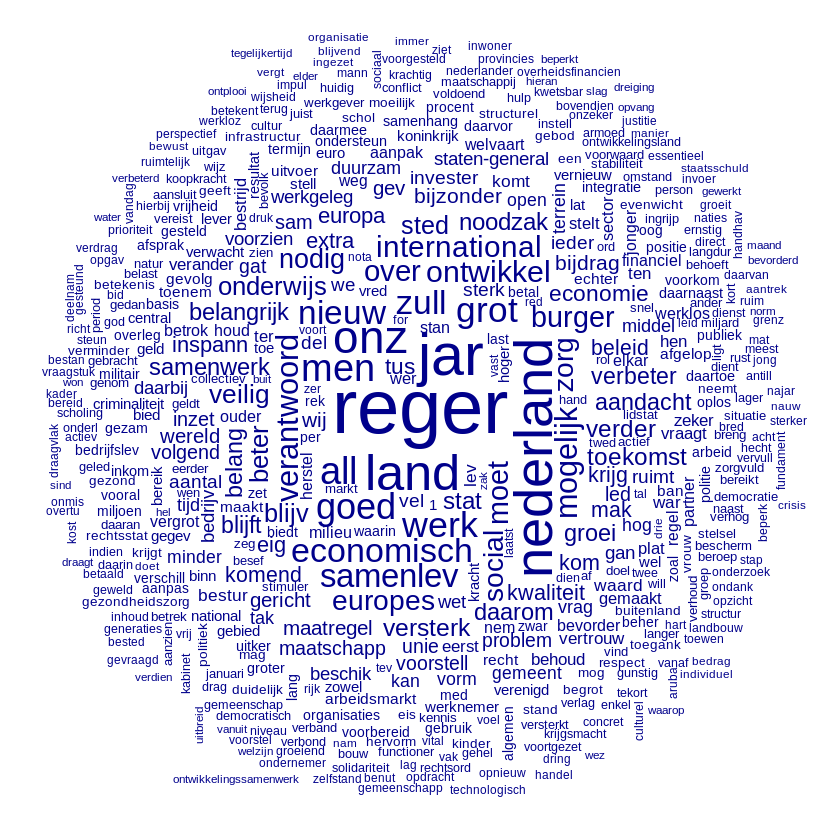

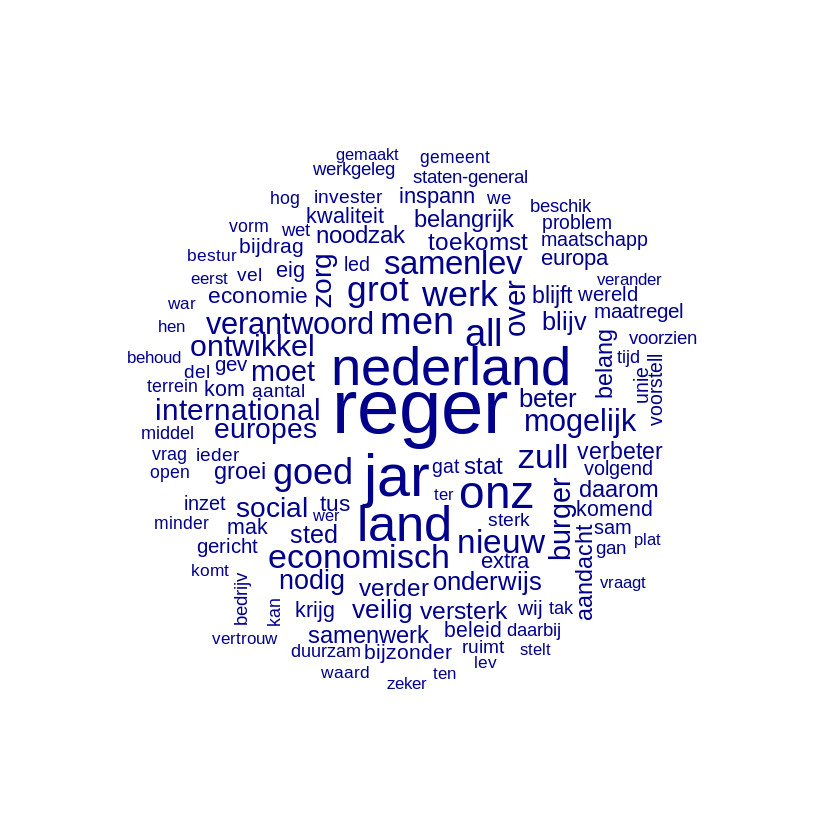

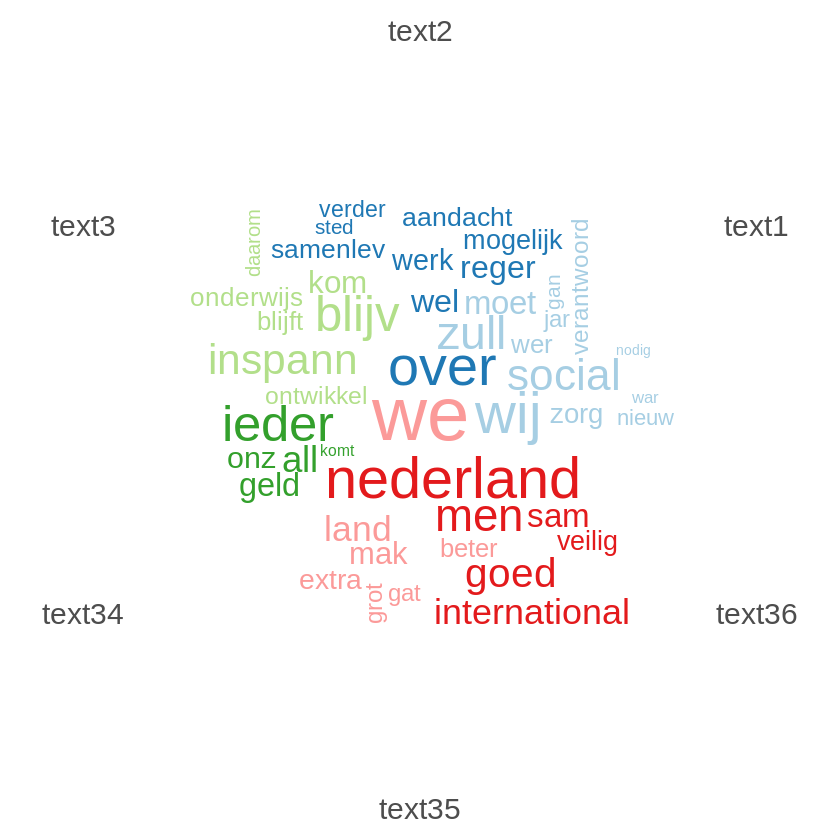

In [28]:
textplot_wordcloud(dtm)
textplot_wordcloud(dtm, min_count = 65)
textplot_wordcloud(dtm[c(1:3,34:36),], min_count = 20, comparison = TRUE)

## Document Similarity

With the document-feature matrix, it is straightforward to evaluate the correlation between documents, and thus the document similarity. We see that all the speeches in our dataset have a strong positive correlation.

[1] 1
[1] "text2"
[1] 2
[1] "text4"
[1] 3
[1] "text2"
[1] 4
[1] "text5"
[1] 5
[1] "text11"
[1] 6
[1] "text7"
[1] 7
[1] "text8"
[1] 8
[1] "text7"
[1] 9
[1] "text7"
[1] 10
[1] "text9"
[1] 11
[1] "text15"
[1] 12
[1] "text18"
[1] 13
[1] "text14"
[1] 14
[1] "text13"
[1] 15
[1] "text17"
[1] 16
[1] "text17"
[1] 17
[1] "text15"
[1] 18
[1] "text17"
[1] 19
[1] "text20"
[1] 20
[1] "text19"
[1] 21
[1] "text19"
[1] 22
[1] "text23"
[1] 23
[1] "text22"
[1] 24
[1] "text25"
[1] 25
[1] "text24"
[1] 26
[1] "text19"
[1] 27
[1] "text17"
[1] 28
[1] "text30"
[1] 29
[1] "text31"
[1] 30
[1] "text28"
[1] 31
[1] "text30"
[1] 32
[1] "text36"
[1] 33
[1] "text35"
[1] 34
[1] "text35"
[1] 35
[1] "text33"
[1] 36
[1] "text32"


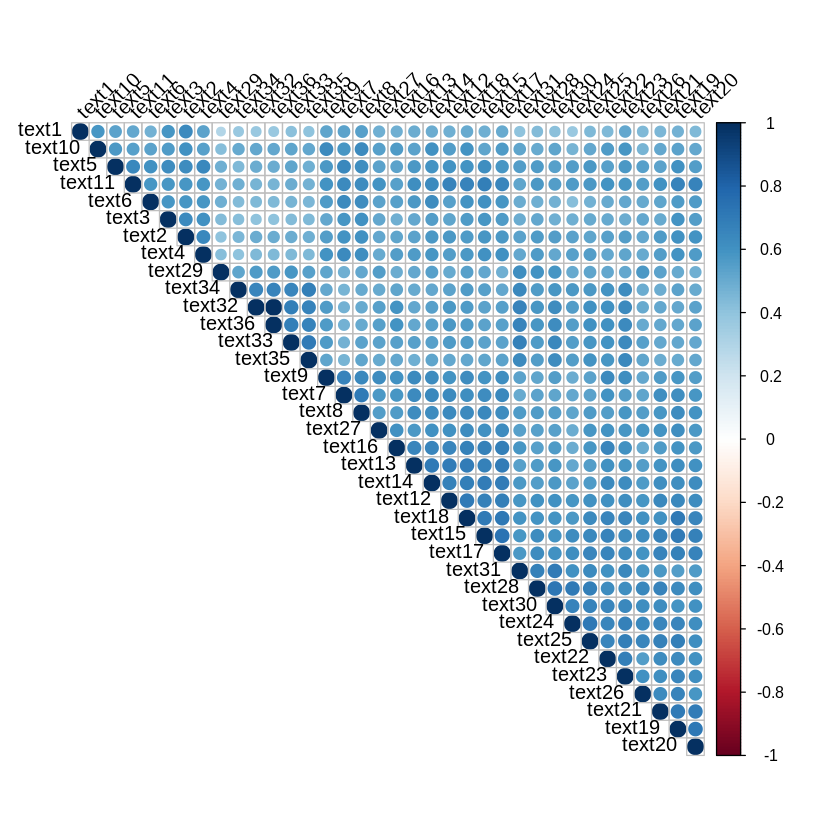

In [29]:
# calculating / visualizing document similarity
res <- as.matrix(textstat_simil(dtm))
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

# doc i is most similar to doc ?
for (i in 1:36){
temp <- res[,-i]
max(temp[i,])
temp[i,]
print(i)
print(colnames(temp)[max.col(as.data.frame(temp[i,, drop = FALSE]))])
}

##Text statistics

Next, we can describe the characteristics of the texts in many different ways

In [32]:
# Determine a readibility score (as a function of Average Sentence Length, number of syllables and number of words)
textstat_readability(troonredes$Tekst)
# please refer to https://quanteda.io/reference/textstat_readability.html for more details


document,Flesch
<chr>,<dbl>
text1,27.18129
text2,24.03135
text3,28.76039
text4,25.44860
text5,22.91751
text6,21.13202
text7,23.79304
text8,25.11474
text9,24.94646


In [33]:
# determine the number of words per document
rowSums(dtm)

text1  text2  text3  text4  text5  text6  text7  text8  text9 text10 text11 
  1033   1107   1343   1271   1229   1096   1421   1419   1437   1441   1442 
text12 text13 text14 text15 text16 text17 text18 text19 text20 text21 text22 
  1048   1303   1398   1362   1353   1199   1256   1283   1280    965    881 
text23 text24 text25 text26 text27 text28 text29 text30 text31 text32 text33 
   804    937    952    778    826    896    759   1058    986   1023   1032 
text34 text35 text36 
   785   1226   1027

In [34]:
# Again, using the original unfiltered and unstemmed text
rowSums(dfm(troonredes$Tekst,                           # input text
                   tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
                   remove = stopwords("dutch"), remove_punct = TRUE))

text1  text2  text3  text4  text5  text6  text7  text8  text9 text10 text11 
  1184   1278   1571   1435   1393   1229   1608   1585   1621   1627   1678 
text12 text13 text14 text15 text16 text17 text18 text19 text20 text21 text22 
  1157   1469   1564   1505   1503   1313   1411   1434   1390   1058    955 
text23 text24 text25 text26 text27 text28 text29 text30 text31 text32 text33 
   884   1028   1104    871    908    995    864   1212   1152   1121   1199 
text34 text35 text36 
   897   1450   1129

In [36]:
#select documents above a threshold (minimum) number of words
minimum <- 1000
selection <- rowSums(dfm(troonredes$Tekst,                           # input text
            tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
            remove = stopwords("dutch"), remove_punct = TRUE))>=minimum
dtm_selection <- dtm[selection,]
dtm_selection

Document-feature matrix of: 29 documents, 2,255 features (71.8% sparse).
       features
docs    led staten-general kabinet twee jar geled beleid uiteengezet kom behoud
  text1   2              2       4    2  16     2      2           2   6      5
  text2   2              2       0    2  16     1      6           0   3      2
  text3   4              2       2    0  16     1      4           0   8      4
  text4   2              2       1    1  11     1      4           0   3      1
  text5   3              2       0    0  23     3      7           0   7      2
  text6   2              2       3    1  12     1      0           0   3      1
[ reached max_ndoc ... 23 more documents, reached max_nfeat ... 2,245 more features ]

In [38]:
# determine the number of sentences 
tok_sent <- tokenize_sentences(troonredes$Tekst)
cbind(troonredes$Jaar, lengths(tok_sent))

1984,124
1985,123
1986,161
1987,155
1988,140
1989,120
1990,187
1991,159
1992,180
1993,190
1994,185


In [39]:
# Determine the average number of words per sentence
tok_sent <- tokenize_sentences(troonredes$Tekst)
tok_words <- tokenize_words(troonredes$Tekst)
cbind(troonredes$Jaar, lengths(tok_words) / lengths(tok_sent))

1984,18.07258
1985,19.48780
1986,18.83230
1987,18.14194
1988,19.13571
1989,19.59167
1990,16.45455
1991,19.50943
1992,16.84444
1993,16.94211
1994,16.74595


In [41]:
# compare lexical diversity (% unique words)
quanteda::textstat_lexdiv(dfm(troonredes$Tekst,               # input text
                             tolower = TRUE, stem = FALSE,    # set lowercasing and stemming to TRUE
                             remove = stopwords("dutch"), remove_punct = TRUE), measure = "TTR")

document,TTR
<chr>,<dbl>
text1,0.6474576
text2,0.6592710
text3,0.6310680
text4,0.6477591
text5,0.6251799
text6,0.6741108
text7,0.5993730
text8,0.6083650
text9,0.6168630


## Showing keywords in context

This function allows you to search specific words and see the context in which they were used in the documents.

In [43]:
## Showing 'keywords in context' (kwic)
kwic(troonredes$Tekst, pattern = phrase("economie"), window = 5)
kwic(troonredes$Tekst, pattern = phrase("terreur"), window = 5)
kwic(troonredes$Tekst, pattern = phrase("econom*"), window = 3)
kwic(troonredes$Tekst, pattern = phrase("cris*"), window = 3)

,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text1,2326,2326,maar zeker geraken wij met,economie,en werkgelegenheid uit het slop,economie
2,text2,12,12,"gunstige wending , die onze",economie,"vorig jaar heeft genomen ,",economie
3,text2,112,112,hand gaat met een veerkrachtiger,economie,. Voor dat beleid zijn,economie
4,text2,429,429,heeft het vertrouwen in onze,economie,helpen herstellen . Gelukkig is,economie
5,text2,877,877,bij het herstel van de,economie,", waardoor meer mensen de",economie
6,text2,1466,1466,en de kwaliteit van de,economie,. Naast beroepsonderwijs en leerlingwezen,economie
7,text3,943,943,"is om , nu de",economie,"aantrekt , meer kansen te",economie
8,text4,850,850,in onze samenleving . Onze,economie,heeft de afgelopen drie jaar,economie
9,text4,944,944,", gericht op versterking van",economie,en werkgelegenheid op langere termijn,economie


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text14,2674,2674,alle vormen van geweld en,terreur,. Het respecteren van de,terreur
2,text21,905,905,pluriforme samenleving te beschermen tegen,terreur,", heeft de regering aangekondigd",terreur
3,text33,1785,1785,van burgers . Oorlog en,terreur,drijven onschuldige mensen van huis,terreur


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text1,2240,2240,", culturele en",economische,contacten de ontspanning,econom*
2,text1,2326,2326,geraken wij met,economie,en werkgelegenheid uit,econom*
3,text2,12,12,", die onze",economie,vorig jaar heeft,econom*
4,text2,112,112,met een veerkrachtiger,economie,. Voor dat,econom*
5,text2,184,184,bij gebrek aan,economisch,draagvlak bedreigd zou,econom*
6,text2,429,429,vertrouwen in onze,economie,helpen herstellen .,econom*
7,text2,767,767,Ofschoon weer enige,economische,groei wordt bereikt,econom*
8,text2,877,877,herstel van de,economie,", waardoor meer",econom*
9,text2,1466,1466,kwaliteit van de,economie,. Naast beroepsonderwijs,econom*


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text7,123,123,verwanten . De,crisis,in de Golf-regio,cris*
2,text7,1068,1068,dan nu de,crisis,in het Midden-Oosten,cris*
3,text17,2055,2055,van Europa aan,crisisbeheersings-,en vredesoperaties dient,cris*
4,text18,2274,2274,deel aan internationale,crisisbeheersingsoperaties,", vaak onder",cris*
5,text18,2352,2352,het vermogen tot,crisisbeheersing,binnen het gezamenlijke,cris*
6,text20,741,741,2200 militairen in,crisisbeheersingsoperaties,levert Nederland hieraan,cris*
7,text21,1216,1216,naar de ernstige,crisis,in Soedan .,cris*
8,text22,790,790,en aan internationale,crisisbeheersingsoperaties,. Bij wederopbouw,cris*
9,text25,174,174,", ontwikkelingssamenwerking en",crisisbeheersing,onverminderd voort .,cris*


## Comparing the words used in different groups of documents

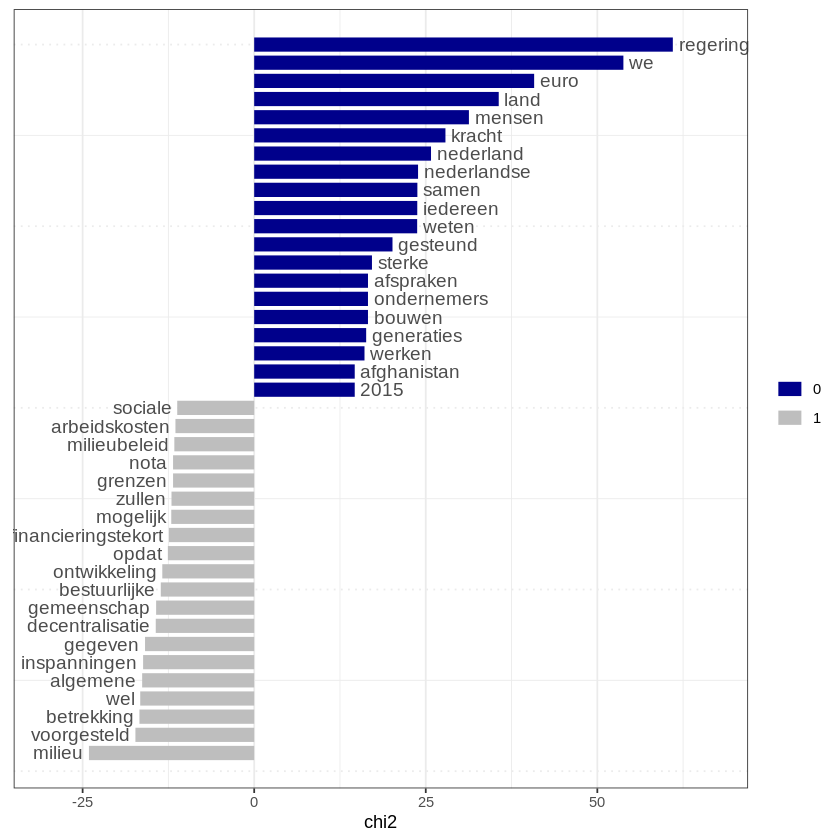

In [45]:
# create DTM that separates pre 2000 from the years after that
troonredes <- c(troonredes, groep = list(as.numeric(troonredes$Jaar<2000)))
dtm_groep = dfm(troonredes$Tekst, groups = troonredes$groep, 
               remove = stopwords("dutch"), remove_punct = TRUE)

# compare target (in this case pre-2000) to rest of DTM (in this case 2000 and after)
keyness = textstat_keyness(dtm_groep) 
# plot which words are more likely to be used in either group
textplot_keyness(keyness)

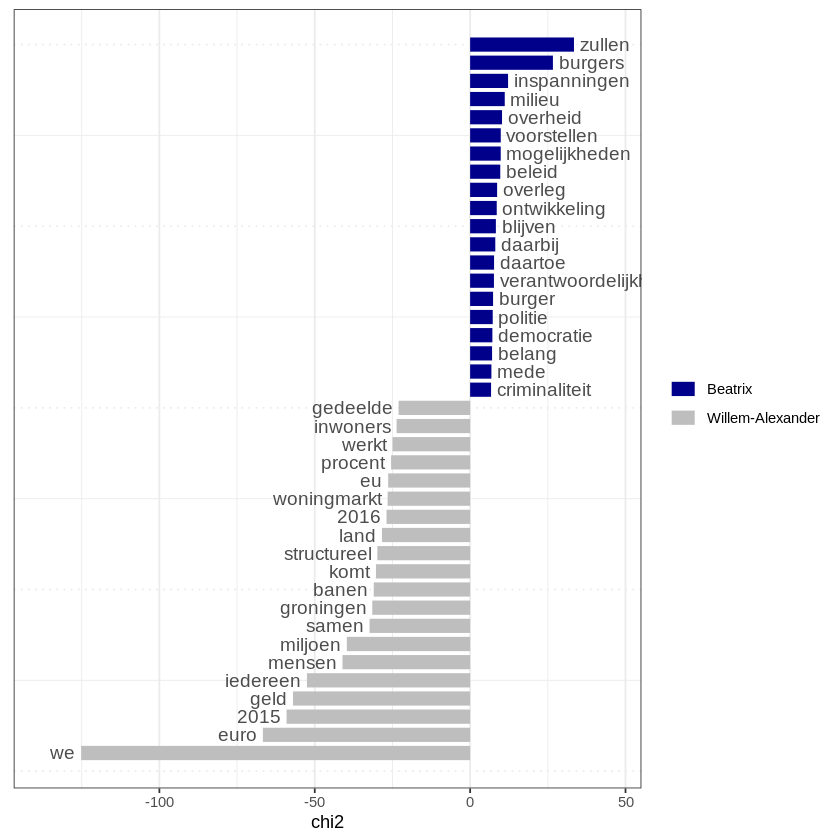

In [46]:
# create DTM that separates speeches by Beatrix from speeches by Willem-Alexander
dtm_spreker = dfm(troonredes$Tekst, groups = troonredes$Spreker, 
                remove = stopwords("dutch"), remove_punct = TRUE)

# compare target (in this case Beatrix) to rest of DTM (in this case Willem-Alexander)
keyness = textstat_keyness(dtm_spreker) 
# plot which words are more likely to be used by the King or the former Queen
textplot_keyness(keyness)

## Counting and Dictionary

Document-feature matrix of: 36 documents, 3 features (22.2% sparse).
       features
docs    terreur economie _unmatched
  text1       0       11       1022
  text2       0       13       1094
  text3       0        7       1336
  text4       0       19       1252
  text5       0       15       1214
  text6       0       25       1071
[ reached max_ndoc ... 30 more documents ]

Document-feature matrix of: 6 documents, 3 features (11.1% sparse).
        features
docs     terreur economie _unmatched
  text31       0       24        962
  text32       2       11       1010
  text33       3       13       1016
  text34       3        5        777
  text35       0       12       1214
  text36       2       11       1014

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”


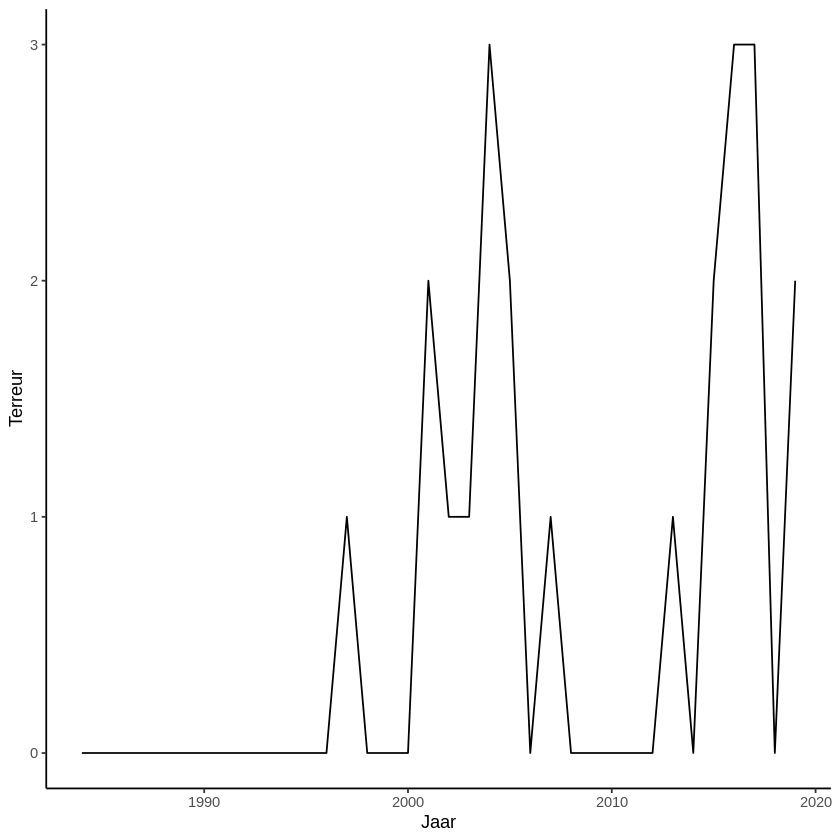

In [47]:
# step 1: define dictionary
myDict <- dictionary(list(terreur = c("terror*", "terreur*"), 
                          economie = c("econom*", "werkgel*", "arbeids*"))) 

# step 2: count
dict_dtm <- dfm_lookup(dtm, myDict, nomatch = "_unmatched") 
dict_dtm
tail(dict_dtm)

# step 3: plot occurrence or terreur
library(ggplot2)
ggplot(data=as.data.frame(dict_dtm), aes(x = 1984:2019, y = terreur))+
        geom_line()+theme_classic()+xlab("Jaar")+ylab("Terreur")

# To Conclude

This notebook showed a glimpse of all the possibilities regarding working with text in R. For other applications, such as supervised and unsupervised learning, and for more general background information, please refer to the article mentioned at the top of this notebook.